# Amsterdam AirBnb Data

## Questions

1. What are the least busiest times of the year to visit Amsterdam?
2. Which locations are most inexpensive?
3. What are the main factors to affect the price of the rental properties?

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
matplotlib.style.use('ggplot')
%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split 
from sklearn.metrics import r2_score, mean_squared_error 


### Data Gathering

In [2]:
df_c=pd.read_csv('calendar.csv')

In [3]:
df_l=pd.read_csv('listings.csv')

In [4]:
df_r=pd.read_csv('reviews.csv')

In [5]:
df_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7068247 entries, 0 to 7068246
Data columns (total 7 columns):
listing_id        int64
date              object
available         object
price             object
adjusted_price    object
minimum_nights    float64
maximum_nights    float64
dtypes: float64(2), int64(1), object(4)
memory usage: 377.5+ MB


In [6]:
df_l.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19362 entries, 0 to 19361
Data columns (total 16 columns):
id                                19362 non-null int64
name                              19329 non-null object
host_id                           19362 non-null int64
host_name                         19358 non-null object
neighbourhood_group               0 non-null float64
neighbourhood                     19362 non-null object
latitude                          19362 non-null float64
longitude                         19362 non-null float64
room_type                         19362 non-null object
price                             19362 non-null int64
minimum_nights                    19362 non-null int64
number_of_reviews                 19362 non-null int64
last_review                       17078 non-null object
reviews_per_month                 17078 non-null float64
calculated_host_listings_count    19362 non-null int64
availability_365                  19362 non-null int64
dt

In [7]:
df_r.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 489777 entries, 0 to 489776
Data columns (total 2 columns):
listing_id    489777 non-null int64
date          489777 non-null object
dtypes: int64(1), object(1)
memory usage: 7.5+ MB


In [8]:
df_c.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,193038,2020-04-18,t,$75.00,$75.00,3.0,1125.0
1,2818,2020-04-19,f,$69.00,$69.00,3.0,1125.0
2,2818,2020-04-20,t,$59.00,$59.00,3.0,1125.0
3,2818,2020-04-21,t,$59.00,$59.00,3.0,1125.0
4,2818,2020-04-22,t,$59.00,$59.00,3.0,1125.0


In [9]:
df_l.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2818,Quiet Garden View Room & Super Fast WiFi,3159,Daniel,NaN,Oostelijk Havengebied - Indische Buurt,52.36575,4.94142,Private room,59,3,278,2020-02-14,2.06,1,169
1,20168,Studio with private bathroom in the centre 1,59484,Alexander,NaN,Centrum-Oost,52.36509,4.89354,Private room,100,1,340,2020-04-09,2.76,2,106
2,25428,Lovely apt in City Centre (w.lift) near Jordaan,56142,Joan,NaN,Centrum-West,52.37297,4.88339,Entire home/apt,125,14,5,2020-02-09,0.18,1,132
3,27886,"Romantic, stylish B&B houseboat in canal district",97647,Flip,NaN,Centrum-West,52.38761,4.89188,Private room,155,2,217,2020-03-02,2.15,1,172
4,28871,Comfortable double room,124245,Edwin,NaN,Centrum-West,52.36719,4.89092,Private room,75,2,332,2020-03-16,2.82,3,210


In [10]:
df_r.head()

,listing_id,date
0,2818,2009-03-30
1,2818,2009-04-24
2,2818,2009-05-03
3,2818,2009-05-18
4,2818,2009-05-25


In [11]:
df_c.describe()

,listing_id,minimum_nights,maximum_nights
count,7.068247e+06,7.067389e+06,7.067389e+06
mean,1.973620e+07,3.617540e+00,2.097263e+05
std,1.204456e+07,1.529362e+01,2.118719e+07
min,2.818000e+03,1.000000e+00,1.000000e+00
25%,9.829578e+06,2.000000e+00,2.100000e+01
50%,1.874645e+07,2.000000e+00,1.125000e+03
75%,2.900137e+07,3.000000e+00,1.125000e+03
max,4.318634e+07,1.001000e+03,2.147484e+09


In [12]:
df_l.describe()

,id,host_id,neighbourhood_group,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,1.936200e+04,1.936200e+04,0.0,19362.000000,19362.000000,19362.000000,19362.000000,19362.000000,17078.000000,19362.000000,19362.000000
mean,1.973676e+07,6.331923e+07,NaN,52.365373,4.889575,165.797645,3.530472,25.295786,0.826230,1.991117,52.684072
std,1.204482e+07,7.980186e+07,NaN,0.016391,0.035922,233.104673,15.265697,54.488486,1.337525,4.588993,100.285148
min,2.818000e+03,3.159000e+03,NaN,52.289270,4.755720,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.830531e+06,9.119502e+06,NaN,52.355130,4.863882,99.000000,2.000000,2.000000,0.190000,1.000000,0.000000
50%,1.874661e+07,2.717150e+07,NaN,52.364700,4.887170,134.000000,2.000000,9.000000,0.430000,1.000000,0.000000
75%,2.900125e+07,8.332593e+07,NaN,52.375267,4.909217,189.000000,3.000000,24.000000,0.860000,1.000000,55.000000
max,4.318634e+07,3.438697e+08,NaN,52.425120,5.027690,9000.000000,1001.000000,850.000000,58.510000,53.000000,365.000000


In [13]:
df_r.describe()

,listing_id
count,4.897770e+05
mean,1.218482e+07
std,9.993554e+06
min,2.818000e+03
25%,3.258033e+06
50%,1.044356e+07
75%,1.885510e+07
max,4.307654e+07


### Data Wrangling


In [14]:
df_c['date']= pd.to_datetime(df_c['date'])

In [15]:
df_c['year']=df_c['date'].dt.year

In [16]:
df_c['month']=df_c['date'].dt.month

In [17]:
df_c['day']=df_c['date'].dt.month

In [18]:
df_c['price'] = df_c['price'].apply(lambda x: str(x).replace('$',''))
df_c['price'] = pd.to_numeric(df_c['price'], errors = 'coerce')

In [19]:
df_c['adjusted_price'] = df_c['adjusted_price'].apply(lambda x: str(x).replace('$',''))
df_c['adjusted_price'] = pd.to_numeric(df_c['adjusted_price'], errors = 'coerce')

In [20]:
df_c.info(verbose=True, null_counts=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7068247 entries, 0 to 7068246
Data columns (total 10 columns):
listing_id        7068247 non-null int64
date              7068247 non-null datetime64[ns]
available         7068247 non-null object
price             7051801 non-null float64
adjusted_price    7052532 non-null float64
minimum_nights    7067389 non-null float64
maximum_nights    7067389 non-null float64
year              7068247 non-null int64
month             7068247 non-null int64
day               7068247 non-null int64
dtypes: datetime64[ns](1), float64(4), int64(4), object(1)
memory usage: 539.3+ MB


In [21]:
missing_columns=['price','adjusted_price','minimum_nights','maximum_nights']

for col in missing_columns:
    df_c[col].fillna(df_c[col].mean(), inplace=True)

In [22]:
df_c.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7068247 entries, 0 to 7068246
Data columns (total 10 columns):
listing_id        7068247 non-null int64
date              7068247 non-null datetime64[ns]
available         7068247 non-null object
price             7068247 non-null float64
adjusted_price    7068247 non-null float64
minimum_nights    7068247 non-null float64
maximum_nights    7068247 non-null float64
year              7068247 non-null int64
month             7068247 non-null int64
day               7068247 non-null int64
dtypes: datetime64[ns](1), float64(4), int64(4), object(1)
memory usage: 539.3+ MB


In [23]:
df_l=df_l.drop(columns=['neighbourhood_group'])
df_l.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19362 entries, 0 to 19361
Data columns (total 15 columns):
id                                19362 non-null int64
name                              19329 non-null object
host_id                           19362 non-null int64
host_name                         19358 non-null object
neighbourhood                     19362 non-null object
latitude                          19362 non-null float64
longitude                         19362 non-null float64
room_type                         19362 non-null object
price                             19362 non-null int64
minimum_nights                    19362 non-null int64
number_of_reviews                 19362 non-null int64
last_review                       17078 non-null object
reviews_per_month                 17078 non-null float64
calculated_host_listings_count    19362 non-null int64
availability_365                  19362 non-null int64
dtypes: float64(3), int64(7), object(5)
memory usage: 2

In [24]:
missing_columns=['reviews_per_month']
for col in missing_columns:
    df_l[col].fillna(df_l[col].mean(), inplace=True)

In [25]:
missing_mode=['name','host_name','last_review']
for col in missing_mode:
    df_l[col].fillna(df_l[col].mode()[0],inplace=True)

In [26]:
df_r['date']= pd.to_datetime(df_r['date'])

In [27]:
df_r['year']=df_r['date'].dt.year

In [28]:
df_r['month']=df_r['date'].dt.month

In [29]:
df_r['day']=df_r['date'].dt.month

In [30]:
df_r.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 489777 entries, 0 to 489776
Data columns (total 5 columns):
listing_id    489777 non-null int64
date          489777 non-null datetime64[ns]
year          489777 non-null int64
month         489777 non-null int64
day           489777 non-null int64
dtypes: datetime64[ns](1), int64(4)
memory usage: 18.7 MB


In [31]:
df_r.head()

,listing_id,date,year,month,day
0,2818,2009-03-30,2009,3,3
1,2818,2009-04-24,2009,4,4
2,2818,2009-05-03,2009,5,5
3,2818,2009-05-18,2009,5,5
4,2818,2009-05-25,2009,5,5


## Data Analyzation

### 1. What are the least busiest times of the year to visit Amsterdam?

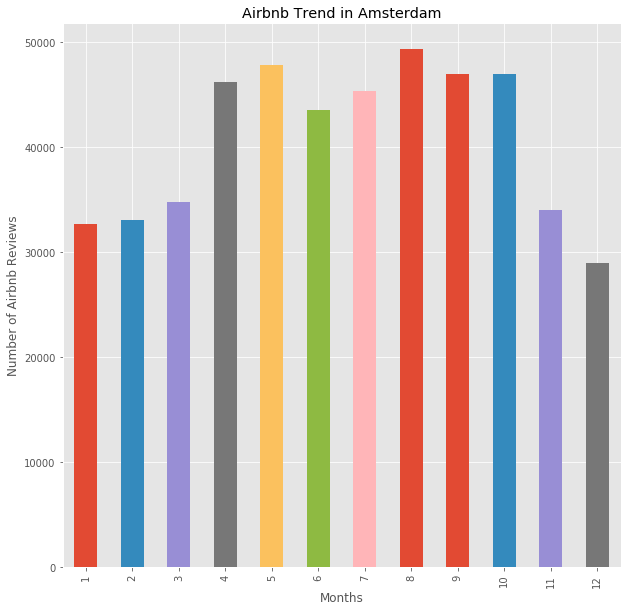

In [32]:
#cats=['Jan', 'Feb', 'Mar', 'Apr','May','Jun', 'Jul', 'Aug','Sep', 'Oct', 'Nov', 'Dec']
figsize = (10, 10)
month_count = df_r['month'].value_counts(sort=False)
plt.xlabel('Months')
plt.ylabel('Number of Airbnb Reviews')
month_count.plot( kind='bar',legend= False, title='Airbnb Trend in Amsterdam',figsize=figsize )

In [34]:
m_p = df_c.groupby(['month']).mean()['price']


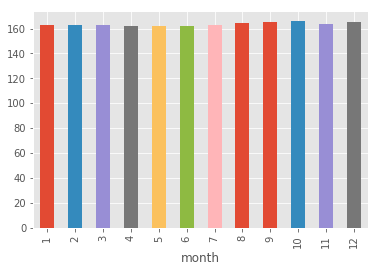

In [35]:
m_p.plot(kind= 'bar')

In [36]:
print(m_p)

month
1     162.975796
2     162.944374
3     163.118090
4     162.290898
5     162.113942
6     162.365488
7     163.147246
8     164.530377
9     164.898886
10    166.073972
11    164.026514
12    164.919836
Name: price, dtype: float64


From the review plot we can see that the least busiest months are in winter, December,January,and February. However,December has the least reviews but has the highest price. 

From the price plot of Airbnb we can see that the lowest price is in May, which is the second busiest months of the people to visit. The highest price is in December, which has the least reviews.There is a slight price difference every month from the highest price to the lowest. 


### Which locations are most inexpensive?


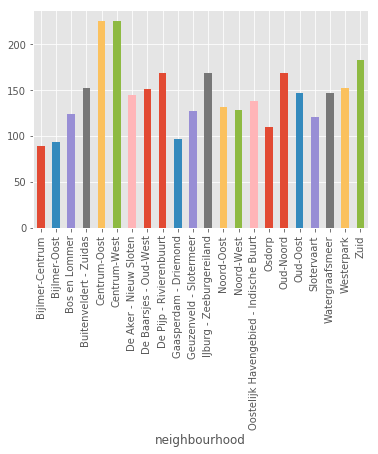

In [37]:
n_p = df_l.groupby(['neighbourhood']).mean()['price']
n_p.plot(kind= 'bar')


From the above we can see that Bijlmer-Centrum is the most inexpensive neighbourhood.

In [38]:
df_l=df_l.drop(columns=['id', 'host_name', 'last_review','name'])
df_l.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19362 entries, 0 to 19361
Data columns (total 11 columns):
host_id                           19362 non-null int64
neighbourhood                     19362 non-null object
latitude                          19362 non-null float64
longitude                         19362 non-null float64
room_type                         19362 non-null object
price                             19362 non-null int64
minimum_nights                    19362 non-null int64
number_of_reviews                 19362 non-null int64
reviews_per_month                 19362 non-null float64
calculated_host_listings_count    19362 non-null int64
availability_365                  19362 non-null int64
dtypes: float64(3), int64(6), object(2)
memory usage: 1.6+ MB


In [39]:
df_l = df_l[['price', 'host_id','neighbourhood','latitude','longitude','room_type','minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365']]

In [40]:
df_l = pd.get_dummies(df_l, columns=['neighbourhood','room_type'])

## Splitting the dataset into the Training set and Test set

In [41]:
X=df_l.iloc[:,1:].values
y=df_l.iloc[:,0].values
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.25,random_state=0)

## Feature Scaling


In [42]:
from sklearn.preprocessing import StandardScaler

In [43]:
sc= StandardScaler()
X_train =sc.fit_transform(X_train)
X_test =sc.transform(X_test)

## Training the Random Forest Regression model on the training set

In [44]:
from sklearn.ensemble import RandomForestRegressor


In [45]:
regressor= RandomForestRegressor(n_estimators=200,random_state=0)
regressor.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

## Predicting the Test set results

In [46]:
y_pred=regressor.predict(X_test)

## Scoring the Model

In [47]:
regressor.score(X_test, y_test)

0.647516584510617

In [48]:
df_l.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19362 entries, 0 to 19361
Data columns (total 35 columns):
price                                                   19362 non-null int64
host_id                                                 19362 non-null int64
latitude                                                19362 non-null float64
longitude                                               19362 non-null float64
minimum_nights                                          19362 non-null int64
number_of_reviews                                       19362 non-null int64
reviews_per_month                                       19362 non-null float64
calculated_host_listings_count                          19362 non-null int64
availability_365                                        19362 non-null int64
neighbourhood_Bijlmer-Centrum                           19362 non-null uint8
neighbourhood_Bijlmer-Oost                              19362 non-null uint8
neighbourhood_Bos en Lommer           

## What are the main factors to affect the price of the rental properties?

## Feature importance in RandomForest Regressor

In [49]:
col=['host_id','latitude','longitude','minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365','neighbourhood_Bijlmer-Centrum','neighbourhood_Bijlmer-Oost','neighbourhood_Bos en Lommer','neighbourhood_Buitenveldert - Zuidas','neighbourhood_Centrum-Oost','neighbourhood_Centrum-West','neighbourhood_De Aker - Nieuw Sloten','neighbourhood_De Baarsjes - Oud-West','neighbourhood_De Pijp - Rivierenbuurt','neighbourhood_Gaasperdam - Driemond','neighbourhood_Geuzenveld - Slotermeer','neighbourhood_IJburg - Zeeburgereiland','neighbourhood_Noord-Oost','neighbourhood_Noord-West','neighbourhood_Oostelijk Havengebied - Indische Buurt','neighbourhood_Osdorp','neighbourhood_Oud-Noord','neighbourhood_Oud-Oost','neighbourhood_Slotervaart','neighbourhood_Watergraafsmeer','neighbourhood_Westerpark','neighbourhood_Zuid','room_type_Entire home/apt','room_type_Hotel room','room_type_Private room','room_type_Shared room']

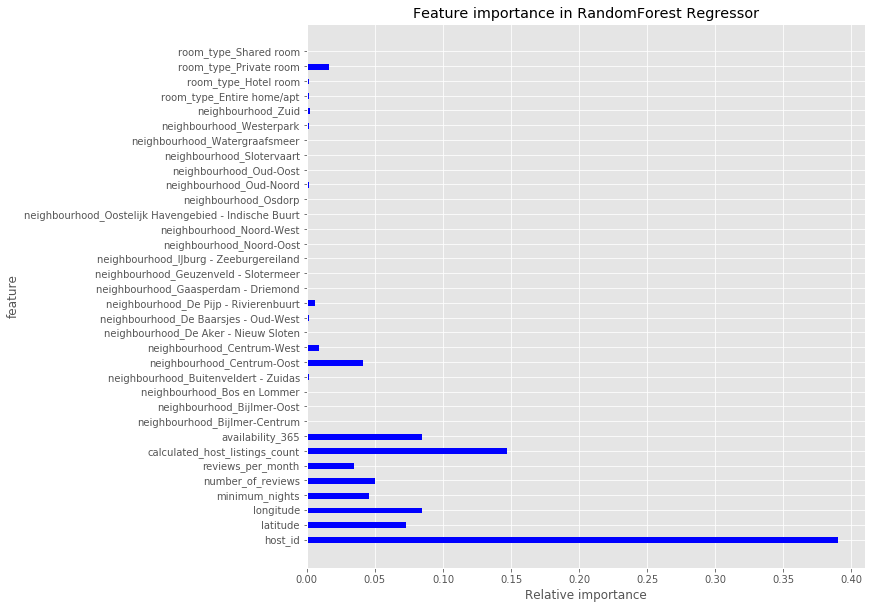

In [50]:
imp=regressor.feature_importances_
fig,ax =plt.subplots()
width=0.4
ind=np.arange(len(imp))
ax.barh(ind,imp,width,color='blue')
ax.set_yticks(ind+width/10)
ax.set_yticklabels(col,minor=False)
plt.title('Feature importance in RandomForest Regressor')
plt.xlabel('Relative importance')
plt.ylabel('feature')
plt.figure(figsize=(10,10))
fig.set_size_inches(10,10,forward=True)

## Data Visulization

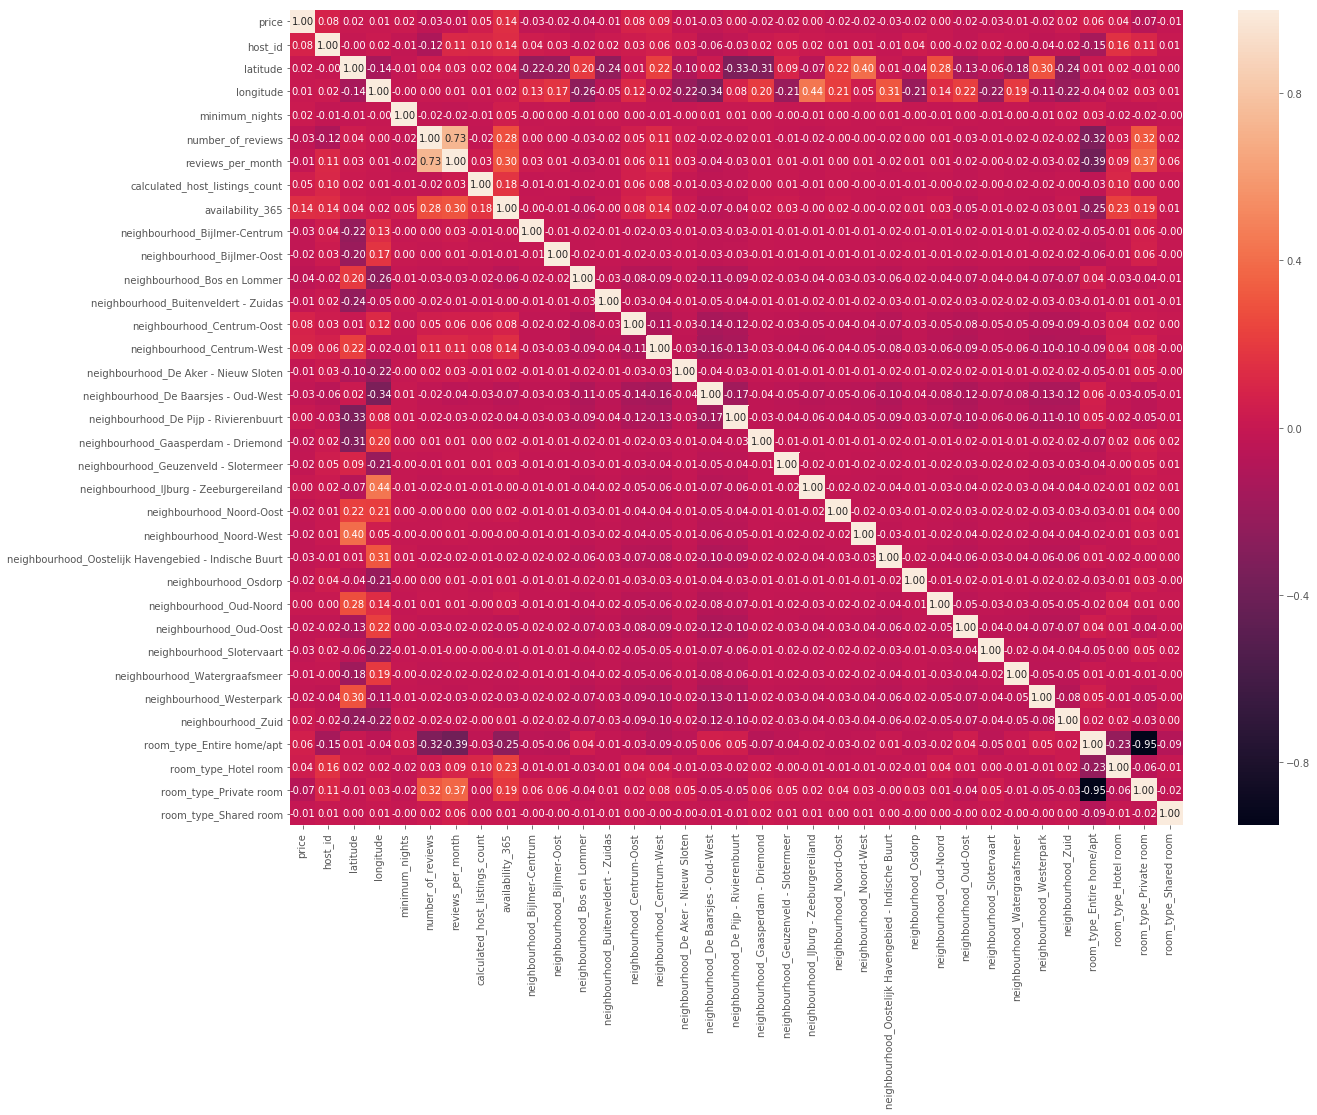

In [51]:
plt.subplots(figsize=(20,15))
sns.heatmap(df_l.corr(), annot=True, fmt='.2f');

From the feature importance in Random Forest regression chart, it can be observed that the relatively important features to the model are the host_listing counts, avalibility.

From the correlation heat map, it observed that price has no strong correlation feautres with the target. However, there are 3 data significantly correlated than others. Availability has 0.14, neighbourbood centrum_West has 0.09 and neighbourhood centrum_oost has 0.08.


# Conclusion


1. The least busiest times of the year to visit Amsterdam is in winter, December, January and February. However, the price variance is very low every months, even the price is a litle bit higher in the least busiest months. 
2. Bijlmer-Centrum is the most inexpensive neighbourhood.
3. I used Random Forest Regression Model to analyze the data, the model has an accuracy of 64% which is not high.
4. The relatively important features are the host_listing counts, avalibility to the model.
5. Avalability and neighbourhood might be affect the reservation price. 